<a href="https://colab.research.google.com/github/Creatrohit9/Tesla-stock-price-prediction/blob/main/Tesla_Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

## <b> Data Description </b>

### <b>Attribute Information: </b>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [7]:
df_stk = pd.read_csv('/content/drive/MyDrive/Fintech Projects/Deep Learning +MLE/Tesla stock price prediction using LSTM/Tesla.csv - Tesla.csv.csv')

In [11]:
df_stk.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [13]:
df_stk.shape

(1692, 6)

In [8]:
df_stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [9]:
df_stk['Date'] = pd.to_datetime(df_stk['Date'])
df_stk.set_index('Date',inplace=True)

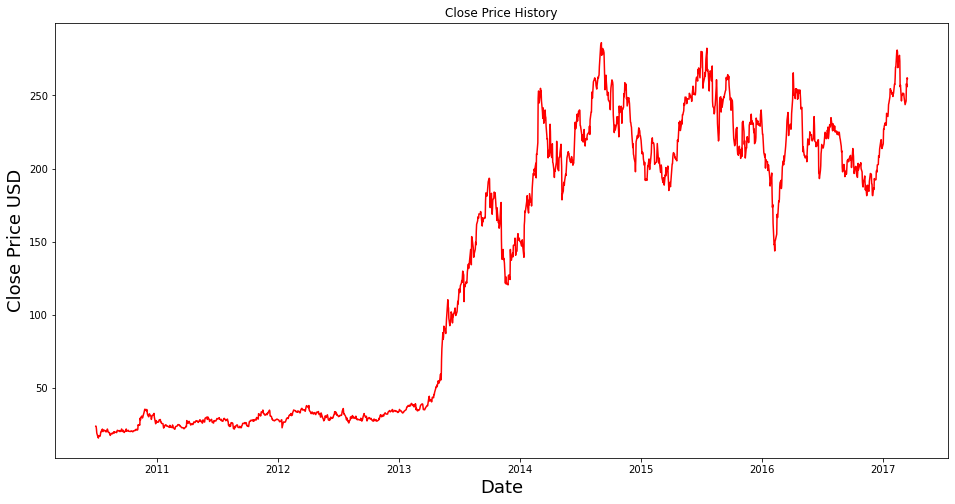

In [10]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df_stk['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [17]:
# create a new data frame with only 'Close column'
data = df_stk.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on""The math. ceil() method rounds a number UP to the nearest integer, if necessary, and returns the result. Tip: To round a number DOWN to the nearest integer, look at the math."
training_data_len


1354

In [14]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [15]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.013913554154743983]



In [19]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1294, 60)

In [20]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [21]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1294/1294 [==============================] - 35s 25ms/step - loss: 0.0039
Epoch 2/10
1294/1294 [==============================] - 32s 25ms/step - loss: 0.0014
Epoch 3/10
1294/1294 [==============================] - 33s 26ms/step - loss: 0.0010
Epoch 4/10
1294/1294 [==============================] - 30s 23ms/step - loss: 6.8012e-04
Epoch 5/10
1294/1294 [==============================] - 30s 23ms/step - loss: 7.6169e-04
Epoch 6/10
1294/1294 [==============================] - 30s 23ms/step - loss: 5.5844e-04
Epoch 7/10
1294/1294 [==============================] - 31s 24ms/step - loss: 6.3928e-04
Epoch 8/10
1294/1294 [==============================] - 30s 23ms/step - loss: 6.5374e-04
Epoch 9/10
1294/1294 [==============================] - 31s 24ms/step - loss: 5.2788e-04
Epoch 10/10
1294/1294 [==============================] - 31s 24ms/step - loss: 5.4503e-04


In [23]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [24]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [25]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

In [26]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [27]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7726039967409389

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


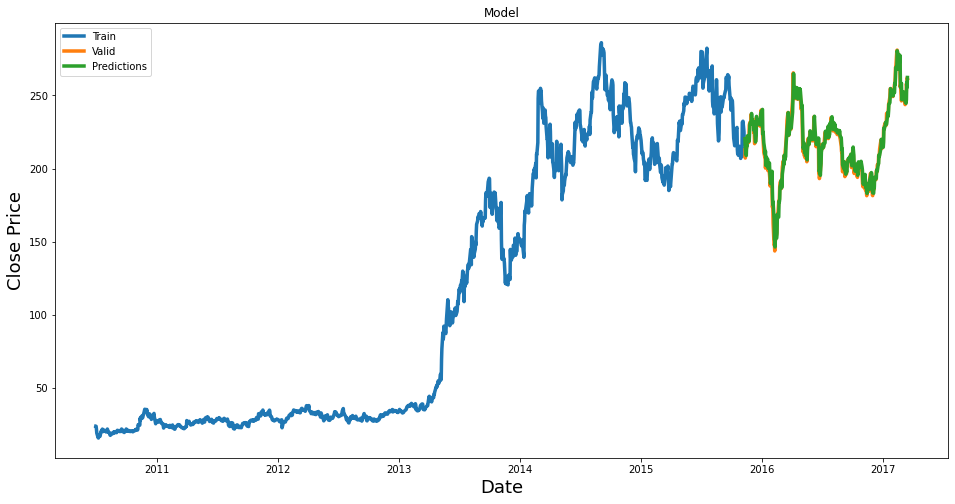

In [28]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')